<a href="https://colab.research.google.com/github/terse-o/Steinmetz-Neural-Dataset/blob/master/Steinmetz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)


In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
#@title Data loading
import numpy as np

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))



In [4]:
# Active Trials - Neuron - Mean - Variance - Variability
def neuron_variability_active(mice):

  uni = np.unique(alldat[mice]['brain_area'])
  nn = len(alldat[mice]['brain_area'])
  barea = len(uni)-1 * np.ones(nn, )
  for j in range(len(uni)-1):
    barea[np.isin(alldat[mice]['brain_area'], uni[j])] = j

  #Active trials
  amean_e1 = [None for _ in range(len(uni))]
  avariance_e1 = [None for _ in range(len(uni))]
  amean_e2 = [None for _ in range(len(uni))]
  avariance_e2 = [None for _ in range(len(uni))]
  amean_e3 = [None for _ in range(len(uni))]
  avariance_e3 = [None for _ in range(len(uni))]
  amean_e4 = [None for _ in range(len(uni))]
  avariance_e4 = [None for _ in range(len(uni))]
  amean_e5 = [None for _ in range(len(uni))]
  avariance_e5 = [None for _ in range(len(uni))]

  #Active epochs
  #Epoch 1: 0-49
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      amean_e1[i] = np.mean(alldat[mice]['spks'][barea==i, j, 0:49])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      avariance_e1[i] = np.var(alldat[mice]['spks'][barea==i, j, 0:49])

  #Epoch 2: 50-99
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      amean_e2[i] = np.mean(alldat[mice]['spks'][barea==i, j, 50:99])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      avariance_e2[i] = np.var(alldat[mice]['spks'][barea==i, j, 50:99])

  #Epoch 3: 100-149
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      amean_e3[i] = np.mean(alldat[mice]['spks'][barea==i, j, 100:149])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      avariance_e3[i] = np.var(alldat[mice]['spks'][barea==i, j, 100:149])

  #Epoch 4: 150-199
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      amean_e4[i] = np.mean(alldat[mice]['spks'][barea==i, j, 150:199])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      avariance_e4[i] = np.var(alldat[mice]['spks'][barea==i, j, 150:199])

  #Epoch 5: 200-250
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      amean_e5[i] = np.mean(alldat[mice]['spks'][barea==i, j, 200:250])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      avariance_e5[i] = np.var(alldat[mice]['spks'][barea==i, j, 200:250])

  #Variability
  avariability_e1 = [i / j for i, j in zip(avariance_e1, amean_e1)]
  avariability_e2 = [i / j for i, j in zip(avariance_e2, amean_e2)] 
  avariability_e3 = [i / j for i, j in zip(avariance_e3, amean_e3)]
  avariability_e4 = [i / j for i, j in zip(avariance_e4, amean_e4)]
  avariability_e5 = [i / j for i, j in zip(avariance_e5, amean_e5)]

  #DF Variability
  a_e1 = list(zip(uni, amean_e1, avariance_e1, avariability_e1))
  a_e2 = list(zip(uni, amean_e2, avariance_e2, avariability_e2))
  a_e3 = list(zip(uni, amean_e3, avariance_e3, avariability_e3))
  a_e4 = list(zip(uni, amean_e4, avariance_e4, avariability_e4))
  a_e5 = list(zip(uni, amean_e5, avariance_e5, avariability_e5))

  column_names = ['Neuron', 'Mean', 'Variance', 'Variability']
  adf_e1 = pd.DataFrame(a_e1, columns=column_names)
  adf_e2 = pd.DataFrame(a_e2, columns=column_names)
  adf_e3 = pd.DataFrame(a_e3, columns=column_names)
  adf_e4 = pd.DataFrame(a_e4, columns=column_names)
  adf_e5 = pd.DataFrame(a_e5, columns=column_names)

  return adf_e1, adf_e2, adf_e3, adf_e4, adf_e5



In [5]:
adf1, adf2, adf3, adf4, adf5 = neuron_variability_active(25)
print(adf1)


  Neuron      Mean  Variance  Variability
0    MOs  0.013032  0.013354     1.024704
1    MRN  0.050033  0.061449     1.228163
2   SCig  0.041676  0.045739     1.097500
3   VISp  0.004913  0.005645     1.148933
4   root  0.010617  0.013175     1.240880


In [6]:
# Passive Trials - Neuron - Mean - Variance - Variability
def neuron_variability_passive(mice):

  uni = np.unique(alldat[mice]['brain_area'])
  nn = len(alldat[mice]['brain_area'])
  barea = len(uni)-1 * np.ones(nn, )
  for j in range(len(uni)-1):
    barea[np.isin(alldat[mice]['brain_area'], uni[j])] = j

  #Passive trials

  pmean_e1 = [None for _ in range(len(uni))]
  pvariance_e1 = [None for _ in range(len(uni))]
  pmean_e2 = [None for _ in range(len(uni))]
  pvariance_e2 = [None for _ in range(len(uni))]
  pmean_e3 = [None for _ in range(len(uni))]
  pvariance_e3 = [None for _ in range(len(uni))]
  pmean_e4 = [None for _ in range(len(uni))]
  pvariance_e4 = [None for _ in range(len(uni))]
  pmean_e5 = [None for _ in range(len(uni))]
  pvariance_e5 = [None for _ in range(len(uni))]

  #Passive epochs
  #Epoch 1: 0-49
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pmean_e1[i] = np.mean(alldat[mice]['spks_passive'][barea==i, j, 0:49])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pvariance_e1[i] = np.var(alldat[mice]['spks_passive'][barea==i, j, 0:49])

  #Epoch 2: 50-99
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pmean_e2[i] = np.mean(alldat[mice]['spks_passive'][barea==i, j, 50:99])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pvariance_e2[i] = np.var(alldat[mice]['spks_passive'][barea==i, j, 50:99])

  #Epoch 3: 100-149
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pmean_e3[i] = np.mean(alldat[mice]['spks_passive'][barea==i, j, 100:149])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pvariance_e3[i] = np.var(alldat[mice]['spks_passive'][barea==i, j, 100:149])

  #Epoch 4: 150-199
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pmean_e4[i] = np.mean(alldat[mice]['spks_passive'][barea==i, j, 150:199])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pvariance_e4[i] = np.var(alldat[mice]['spks_passive'][barea==i, j, 150:199])

  #Epoch 5: 200-250
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pmean_e5[i] = np.mean(alldat[mice]['spks_passive'][barea==i, j, 200:250])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pvariance_e5[i] = np.var(alldat[mice]['spks_passive'][barea==i, j, 200:250])

  #Variability
  pvariability_e1 = [i / j for i, j in zip(pvariance_e1, pmean_e1)]
  pvariability_e2 = [i / j for i, j in zip(pvariance_e2, pmean_e2)] 
  pvariability_e3 = [i / j for i, j in zip(pvariance_e3, pmean_e3)] 
  pvariability_e4 = [i / j for i, j in zip(pvariance_e4, pmean_e4)] 
  pvariability_e5 = [i / j for i, j in zip(pvariance_e5, pmean_e5)] 

  #DF Variability
  p_e1 = list(zip(uni, pmean_e1, pvariance_e1, pvariability_e1))
  p_e2 = list(zip(uni, pmean_e2, pvariance_e2, pvariability_e2))
  p_e3 = list(zip(uni, pmean_e3, pvariance_e3, pvariability_e3))
  p_e4 = list(zip(uni, pmean_e4, pvariance_e4, pvariability_e4))
  p_e5 = list(zip(uni, pmean_e5, pvariance_e5, pvariability_e5))

  column_names = ['Neuron', 'Mean', 'Variance', 'Variability']
  pdf_e1 = pd.DataFrame(p_e1, columns=column_names)
  pdf_e2 = pd.DataFrame(p_e2, columns=column_names)
  pdf_e3 = pd.DataFrame(p_e3, columns=column_names)
  pdf_e4 = pd.DataFrame(p_e4, columns=column_names)
  pdf_e5 = pd.DataFrame(p_e5, columns=column_names)

  return pdf_e1, pdf_e2, pdf_e3, pdf_e4, pdf_e5
   

In [7]:
pdf1, pdf2, pdf3, pdf4, pdf5 = neuron_variability_passive(25)
print(pdf1)


  Neuron      Mean  Variance  Variability
0    MOs  0.012909  0.012742     0.987091
1    MRN  0.034797  0.038289     1.100338
2   SCig  0.035983  0.035977     0.999838
3   VISp  0.010456  0.011103     1.061833
4   root  0.014368  0.015052     1.047579


In [8]:
#Neuron variability through epochs - Mean - Variance
def neuron_variability_epoch(mice):

  uni = np.unique(alldat[mice]['brain_area'])
  
  
  nn = len(alldat[mice]['brain_area'])
  barea = len(uni)-1 * np.ones(nn, )
  for j in range(len(uni)-1):
    barea[np.isin(alldat[mice]['brain_area'], uni[j])] = j

  #Active trials
  amean_e1 = [None for _ in range(len(uni))]
  avariance_e1 = [None for _ in range(len(uni))]
  amean_e2 = [None for _ in range(len(uni))]
  avariance_e2 = [None for _ in range(len(uni))]
  amean_e3 = [None for _ in range(len(uni))]
  avariance_e3 = [None for _ in range(len(uni))]
  amean_e4 = [None for _ in range(len(uni))]
  avariance_e4 = [None for _ in range(len(uni))]
  amean_e5 = [None for _ in range(len(uni))]
  avariance_e5 = [None for _ in range(len(uni))]

  #Active epochs
  #Epoch 1: 0-49
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      amean_e1[i] = np.mean(alldat[mice]['spks'][barea==i, j, 0:49])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      avariance_e1[i] = np.var(alldat[mice]['spks'][barea==i, j, 0:49])

  #Epoch 2: 50-99
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      amean_e2[i] = np.mean(alldat[mice]['spks'][barea==i, j, 50:99])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      avariance_e2[i] = np.var(alldat[mice]['spks'][barea==i, j, 50:99])

  #Epoch 3: 100-149
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      amean_e3[i] = np.mean(alldat[mice]['spks'][barea==i, j, 100:149])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      avariance_e3[i] = np.var(alldat[mice]['spks'][barea==i, j, 100:149])

  #Epoch 4: 150-199
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      amean_e4[i] = np.mean(alldat[mice]['spks'][barea==i, j, 150:199])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      avariance_e4[i] = np.var(alldat[mice]['spks'][barea==i, j, 150:199])

  #Epoch 5: 200-250
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      amean_e5[i] = np.mean(alldat[mice]['spks'][barea==i, j, 200:250])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks'][0])-1):
      avariance_e5[i] = np.var(alldat[mice]['spks'][barea==i, j, 200:250])

  #Active Variability
  avariability_e1 = [i / j for i, j in zip(avariance_e1, amean_e1)]
  avariability_e2 = [i / j for i, j in zip(avariance_e2, amean_e2)] 
  avariability_e3 = [i / j for i, j in zip(avariance_e3, amean_e3)]
  avariability_e4 = [i / j for i, j in zip(avariance_e4, amean_e4)]
  avariability_e5 = [i / j for i, j in zip(avariance_e5, amean_e5)]

  #Passive trials
  pmean_e1 = [None for _ in range(len(uni))]
  pvariance_e1 = [None for _ in range(len(uni))]
  pmean_e2 = [None for _ in range(len(uni))]
  pvariance_e2 = [None for _ in range(len(uni))]
  pmean_e3 = [None for _ in range(len(uni))]
  pvariance_e3 = [None for _ in range(len(uni))]
  pmean_e4 = [None for _ in range(len(uni))]
  pvariance_e4 = [None for _ in range(len(uni))]
  pmean_e5 = [None for _ in range(len(uni))]
  pvariance_e5 = [None for _ in range(len(uni))]

  #Passive epochs
  #Epoch 1: 0-49
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pmean_e1[i] = np.mean(alldat[mice]['spks_passive'][barea==i, j, 0:49])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pvariance_e1[i] = np.var(alldat[mice]['spks_passive'][barea==i, j, 0:49])

  #Epoch 2: 50-99
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pmean_e2[i] = np.mean(alldat[mice]['spks_passive'][barea==i, j, 50:99])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pvariance_e2[i] = np.var(alldat[mice]['spks_passive'][barea==i, j, 50:99])

  #Epoch 3: 100-149
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pmean_e3[i] = np.mean(alldat[mice]['spks_passive'][barea==i, j, 100:149])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pvariance_e3[i] = np.var(alldat[mice]['spks_passive'][barea==i, j, 100:149])

  #Epoch 4: 150-199
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pmean_e4[i] = np.mean(alldat[mice]['spks_passive'][barea==i, j, 150:199])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pvariance_e4[i] = np.var(alldat[mice]['spks_passive'][barea==i, j, 150:199])

  #Epoch 5: 200-250
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pmean_e5[i] = np.mean(alldat[mice]['spks_passive'][barea==i, j, 200:250])
  for i in range(len(uni)):
    for j in range(len(alldat[mice]['spks_passive'][0])-1):
      pvariance_e5[i] = np.var(alldat[mice]['spks_passive'][barea==i, j, 200:250])

  #Passive Variability
  pvariability_e1 = [i / j for i, j in zip(pvariance_e1, pmean_e1)]
  pvariability_e2 = [i / j for i, j in zip(pvariance_e2, pmean_e2)] 
  pvariability_e3 = [i / j for i, j in zip(pvariance_e3, pmean_e3)] 
  pvariability_e4 = [i / j for i, j in zip(pvariance_e4, pmean_e4)] 
  pvariability_e5 = [i / j for i, j in zip(pvariance_e5, pmean_e5)] 

  #DF Variability
  #e1 = list(zip(uni, avariability_e1, pvariability_e1))
  #e2 = list(zip(uni, avariability_e2, pvariability_e2))
  #e3 = list(zip(uni, avariability_e3, pvariability_e3))
  #e4 = list(zip(uni, avariability_e4, pvariability_e4))
  #e5 = list(zip(uni, avariability_e5, pvariability_e5))

  #Variability per Epoch
  act = list(zip(uni, avariability_e1, avariability_e2, avariability_e3, avariability_e4, avariability_e5))
  pas = list(zip(uni, pvariability_e1, pvariability_e2, pvariability_e3, pvariability_e4, pvariability_e5))

  act_mean = list(zip(uni, amean_e1, amean_e2, amean_e3, amean_e4, amean_e5))
  act_var = list(zip(uni, avariance_e1, avariance_e2, avariance_e3, avariance_e4, avariance_e5))

  pas_mean = list(zip(uni, pmean_e1, pmean_e2, pmean_e3, pmean_e4, pmean_e5))
  pas_var = list(zip(uni, pvariance_e1, pvariance_e2, pvariance_e3, pvariance_e4, pvariance_e5))

  column_names_E = ['Neuron', 'Epoch1', 'Epoch2', 'Epoch3', 'Epoch4', 'Epoch5']
  df_a = pd.DataFrame(act, columns=column_names_E)
  df_p = pd.DataFrame(pas, columns=column_names_E)

  df_amean = pd.DataFrame(act_mean, columns=column_names_E)
  df_pmean = pd.DataFrame(pas_mean, columns=column_names_E)
  df_avar = pd.DataFrame(act_var, columns=column_names_E)
  df_pvar = pd.DataFrame(pas_var, columns=column_names_E)
  
  return df_a, df_p, df_amean, df_pmean, df_avar, df_pvar



In [9]:
#Plot Active Trials - Mean v/s Variance - Regression Line
def plot_active_mv(amean, avar):

  result_mean = np.array([])
  result_var = np.array([])

  for i in range(len(amean.index)-1):
    mean = list(amean.iloc[i, 1:])
    var = list(avar.iloc[i, 1:])

    #appending all means and variances for performing regression at the end
    result_mean = np.append(result_mean, mean)
    result_var = np.append(result_var, var)

    plt.scatter(mean, var)
    plt.title("Active trials")
    plt.xlabel("Mean firing rate")
    plt.ylabel("Variance")
    plt.legend(amean.iloc[:,0], loc='center left', bbox_to_anchor=(1.0, 0.5))

  #plotting regression line
  plt.plot(np.unique(result_mean), np.poly1d(np.polyfit(result_mean, result_var, 1))(np.unique(result_mean)))

#Plot Passive Trials - Mean v/s Varince
def plot_passive_mv(pmean, pvar):

  result_mean = np.array([])
  result_var = np.array([])

  for i in range(len(pmean.index)-1):
    mean = list(pmean.iloc[i, 1:])
    var = list(pvar.iloc[i, 1:])
  
    #appending all means and variances for performing regression at the end
    result_mean = np.append(result_mean, mean)
    result_var = np.append(result_var, var)

    plt.scatter(mean, var)
    plt.title("Passive trials")
    plt.xlabel("Mean firing rate")
    plt.ylabel("Variance")
    plt.legend(amean.iloc[:,0], loc='center left', bbox_to_anchor=(1.0, 0.5))

  #plotting regression line
  plt.plot(np.unique(result_mean), np.poly1d(np.polyfit(result_mean, result_var, 1))(np.unique(result_mean)))

In [10]:
#Plot Variability through Epochs
def plot_variability(active, passive):
  active = active.drop(active[active.Neuron == 'root'].index)
  passive = passive.drop(passive[passive.Neuron == 'root'].index)

  active = active.set_index('Neuron').transpose()
  passive = passive.set_index('Neuron').transpose()

  active_plot = active.plot.line(title = 'Active Trials')
  passive_plot = passive.plot.line(title = 'Passive Trials')

  return active_plot, passive_plot
  

(<matplotlib.axes._subplots.AxesSubplot at 0x7f53f4cbcf28>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f53f471fe10>)

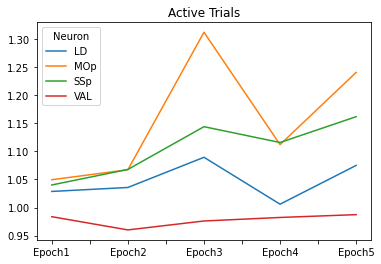

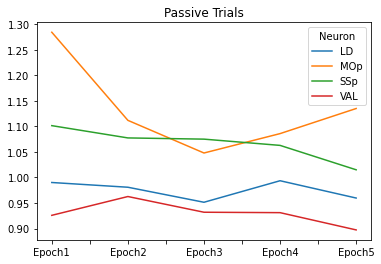

In [11]:
#Try it yourself! - Enter mice number in neuron_variability_epoch()
active, passive, amean, pmean, avar, pvar = neuron_variability_epoch(20)
plot_variability(active, passive)

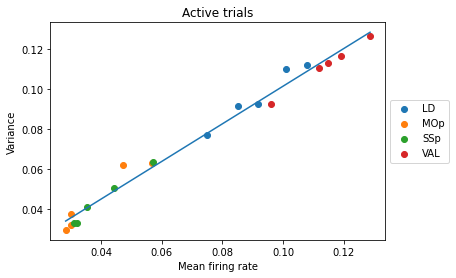

In [12]:
plot_active_mv(amean, avar)

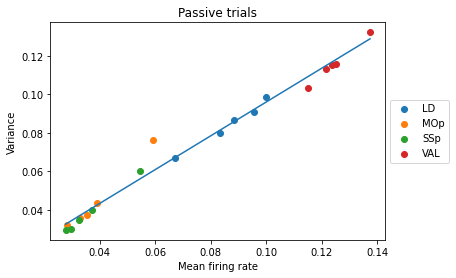

In [13]:
plot_passive_mv(pmean, pvar)